# Recommendation System - Movie Recommendation
## This notebook outlines the concepts involved in building a Complete Recommendation System for recommending Movies to users
## Movie Recommender System - A very very very simple Clone of Netflix

**MovieLens dataset** and build a model to **recommend movies** to the end users. This data has been collected by the GroupLens Research Project at the University of Minnesota.

This dataset consists of:
- **1,000,000 ratings** (1-5) from **6,040 users** on **3,706 movies**
- Demographic information of the users (age, gender, occupation, etc.)

Dataset: movielens/ml-1m.zip

### Import the libraries

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Download the dataset

In [11]:
!wget https://files.grouplens.org/datasets/movielens/ml-1m.zip

--2023-11-19 11:08:11--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip.1’

ml-1m.zip.1           0%[                    ]       0  --.-KB/s               

ml-1m.zip.1         100%[===================>]   5.64M  5.52MB/s    in 1.0s    

2023-11-19 11:08:13 (5.52 MB/s) - ‘ml-1m.zip.1’ saved [5917549/5917549]



In [12]:
!mkdir ml-1m
!cp ml-1m.zip ml-1m
%cd /content/ml-1m
!unzip ml-1m.zip
%cd ..

mkdir: ml-1m: File exists


[Errno 2] No such file or directory: '/content/ml-1m'
/Users/bng-anuphap_c/Desktop/ML2_Assignment/Task4
Archive:  ml-1m.zip
replace ml-1m/movies.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C
/Users/bng-anuphap_c/Desktop/ML2_Assignment


### Load the dataset
### Reading users file
- u.user

- Please check the column names from the readme file
- Pass in column names for each CSV as the column name is not given in the file and read them using pandas
- Use these following columns
    - 'user_id', 'age', 'sex', 'occupation', 'zip_code'

In [21]:
%cd ~/Desktop/ML2_Assignment/Task4/ml-1m

/Users/bng-anuphap_c/Desktop/ML2_Assignment/Task4/ml-1m


In [22]:
%ls

README       movies.dat   ratings.dat  users.dat


In [23]:
u_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users = pd.read_csv('users.dat', sep='::', names=u_cols,encoding='latin-1')

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2924658090.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('users.dat', sep='::', names=u_cols,encoding='latin-1')


### Display the user data

In [25]:
print("\nUser Data :")
print("shape : ", users.shape)
print(users.head())


User Data :
shape :  (6040, 5)
   user_id sex  age  occupation zip_code
0        1   F    1          10    48067
1        2   M   56          16    70072
2        3   M   25          15    55117
3        4   M   45           7    02460
4        5   M   25          20    55455


In [26]:
users

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


### Reading ratings file
- u.data
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [27]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ratings.dat', sep='::', names=r_cols,encoding='latin-1')

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/1976541580.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv('ratings.dat', sep='::', names=r_cols,encoding='latin-1')


### Display the Ratings data

In [28]:
print("\nRatings Data :")
print("shape : ", ratings.shape)
print(ratings.head())


Ratings Data :
shape :  (1000209, 4)
   user_id  movie_id  rating  unix_timestamp
0        1      1193       5       978300760
1        1       661       3       978302109
2        1       914       3       978301968
3        1      3408       4       978300275
4        1      2355       5       978824291


### Reading items file
- u.item
- Use the following columns
    - 'movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
    - 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    - 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'

In [29]:
# Define the genre list
genre_list = [
    'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Function to convert genres to binary values
def convert_genres_to_binary(genres):
    binary_values = [1 if genre in genres else 0 for genre in genre_list]
    return binary_values

# Function to process each line in the dataset
def process_line(line):
    parts = line.strip().split('::')
    movie_id, title, genres = parts[0], parts[1], parts[2]

    # Convert genres to binary values
    binary_genres = convert_genres_to_binary(genres.split('|'))

    # Create the new line with binary genres
    new_line = '::'.join([movie_id, title] + list(map(str, binary_genres)))
    return new_line

# Read the dataset and process each line
with open('movies.dat', 'r', encoding='latin-1') as file:
    lines = file.readlines()

# Create a new file to store the results
with open('movies2.dat', 'w') as output_file:
    # Process each line and write the result to the output file
    for line in lines:
        new_line = process_line(line)
        output_file.write(new_line + '\n')

In [30]:
i_cols = ['movie_id', 'movie_title' , 'Action',
          'Adventure', 'Animation', 'Children\'s', 'Comedy',
          'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery',
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('movies2.dat', sep='::', names=i_cols,encoding='latin-1')

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3648348495.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  items = pd.read_csv('movies2.dat', sep='::', names=i_cols,encoding='latin-1')


### Display the Items data

In [31]:
print("\nItem Data :")
print("shape : ", items.shape)
print(items.head())


Item Data :
shape :  (3883, 20)
   movie_id                         movie_title  Action  Adventure  Animation  \
0         1                    Toy Story (1995)       0          0          1   
1         2                      Jumanji (1995)       0          1          0   
2         3             Grumpier Old Men (1995)       0          0          0   
3         4            Waiting to Exhale (1995)       0          0          0   
4         5  Father of the Bride Part II (1995)       0          0          0   

   Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  \
0           1       1      0            0      0        0          0       0   
1           1       0      0            0      0        1          0       0   
2           0       1      0            0      0        0          0       0   
3           0       1      0            0      1        0          0       0   
4           0       1      0            0      0        0          0       0   


### Reading Training and Testing Ratings data (The 1M MovieLen Dataset is not provide this data)
- Training
    - ua.base
- Testing
    - ua.test
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [32]:
# r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
# ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

### Display the Training and Testing Ratings data

In [33]:
# ratings_train.shape, ratings_test.shape

### How many unique users?

In [34]:
n_users = ratings.user_id.unique().shape[0]
n_users

6040

### How many unique items / movies?

In [35]:
n_items = ratings.movie_id.unique().shape[0]
n_items

3706

### Create a User-Item Matrix

In [36]:
from scipy.sparse import csr_matrix

In [37]:
user_movies_data = ratings.pivot(index = 'movie_id', columns = 'user_id', values = 'rating').fillna(0)

In [38]:
user_movies_data

user_id,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1. Content Filtering

### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [39]:
ratings.movie_id.unique()

array([1193,  661,  914, ..., 2845, 3607, 2909])

In [40]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [41]:
movie_ids_to_filter = ratings.movie_id.unique()
items = items[items['movie_id'].isin(movie_ids_to_filter)]

In [42]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [43]:
items['metadata'] = ""

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2531997522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata'] = ""


In [44]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,


In [45]:
items.Action, type(items.Action)

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3878    0
 3879    0
 3880    0
 3881    0
 3882    0
 Name: Action, Length: 3706, dtype: int64,
 pandas.core.series.Series)

In [46]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "

In [47]:
items['metadata_Action'] = items.Action.apply(metadata_Action)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3544298018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Action'] = items.Action.apply(metadata_Action)


In [48]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata,metadata_Action
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,,
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,,
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,,
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,,
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,,
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,,
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,,
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,,


In [49]:
def metadata_Adventure(x):
    if x == 1:
        return " Adventure "
    else:
        return " "

items['metadata_Adventure'] = items.Adventure.apply(metadata_Adventure)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/923607061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Adventure'] = items.Adventure.apply(metadata_Adventure)


In [50]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata,metadata_Action,metadata_Adventure
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,,,
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,,,Adventure
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,,,
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,,,
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,,,
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,,,
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,,,
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,,,


In [51]:
genres = [
    'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

In [52]:
def metadata_Animation(x):
    if x == 1:
        return " Animation "
    else:
        return " "
items['metadata_Animation'] = items.Animation.apply(metadata_Animation)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3229662412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Animation'] = items.Animation.apply(metadata_Animation)


In [53]:
def metadata_Childrens(x):
    if x == 1:
        return " Children's "
    else:
        return " "

items["metadata_Children's"] = items["Children's"].apply(metadata_Childrens)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2854361628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items["metadata_Children's"] = items["Children's"].apply(metadata_Childrens)


In [54]:
def metadata_Comedy(x):
    if x == 1:
        return " Comedy "
    else:
        return " "

items['metadata_Comedy'] = items.Comedy.apply(metadata_Comedy)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/592637501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Comedy'] = items.Comedy.apply(metadata_Comedy)


In [55]:
def metadata_Crime(x):
    if x == 1:
        return " Crime "
    else:
        return " "

items['metadata_Crime'] = items.Crime.apply(metadata_Crime)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3056512815.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Crime'] = items.Crime.apply(metadata_Crime)


In [56]:
def metadata_Documentary(x):
    if x == 1:
        return " Documentary "
    else:
        return " "

items['metadata_Documentary'] = items.Documentary.apply(metadata_Documentary)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3896093070.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Documentary'] = items.Documentary.apply(metadata_Documentary)


In [57]:
def metadata_Drama(x):
    if x == 1:
        return " Drama "
    else:
        return " "

items['metadata_Drama'] = items.Drama.apply(metadata_Drama)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/1847584548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Drama'] = items.Drama.apply(metadata_Drama)


In [58]:
def metadata_Fantasy(x):
    if x == 1:
        return " Fantasy "
    else:
        return " "

items['metadata_Fantasy'] = items.Fantasy.apply(metadata_Fantasy)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/1153814683.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Fantasy'] = items.Fantasy.apply(metadata_Fantasy)


In [59]:
def metadata_FilmNoir(x):
    if x == 1:
        return " Film-Noir "
    else:
        return " "

items['metadata_Film-Noir'] = items["Film-Noir"].apply(metadata_FilmNoir)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2538530753.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Film-Noir'] = items["Film-Noir"].apply(metadata_FilmNoir)


In [60]:
def metadata_Horror(x):
    if x == 1:
        return "Horror "
    else:
        return " "

items['metadata_Horror'] = items.Horror.apply(metadata_Horror)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3990420734.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Horror'] = items.Horror.apply(metadata_Horror)


In [61]:
def metadata_Musical(x):
    if x == 1:
        return " Musical "
    else:
        return " "

items['metadata_Musical'] = items.Musical.apply(metadata_Musical)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2133527903.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Musical'] = items.Musical.apply(metadata_Musical)


In [62]:
def metadata_Mystery(x):
    if x == 1:
        return " Mystery "
    else:
        return " "

items['metadata_Mystery'] = items.Mystery.apply(metadata_Mystery)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/4257405132.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Mystery'] = items.Mystery.apply(metadata_Mystery)


In [63]:
def metadata_Romance(x):
    if x == 1:
        return " Romance "
    else:
        return " "

items['metadata_Romance'] = items.Romance.apply(metadata_Romance)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/1239340555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Romance'] = items.Romance.apply(metadata_Romance)


In [64]:
def metadata_SciFi(x):
    if x == 1:
        return " Sci-Fi "
    else:
        return " "

items['metadata_Sci-Fi'] = items["Sci-Fi"].apply(metadata_SciFi)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2377482480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Sci-Fi'] = items["Sci-Fi"].apply(metadata_SciFi)


In [65]:
def metadata_Thriller(x):
    if x == 1:
        return " Thriller "
    else:
        return " "

items['metadata_Thriller'] = items.Thriller.apply(metadata_Thriller)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3326916886.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Thriller'] = items.Thriller.apply(metadata_Thriller)


In [66]:
def metadata_War(x):
    if x == 1:
        return " War "
    else:
        return " "

items['metadata_War'] = items.War.apply(metadata_War)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/2961838638.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_War'] = items.War.apply(metadata_War)


In [67]:
def metadata_Western(x):
    if x == 1:
        return " Western "
    else:
        return " "

items['metadata_Western'] = items.Western.apply(metadata_Western)

/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3311799699.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['metadata_Western'] = items.Western.apply(metadata_Western)


In [68]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,metadata_Fantasy,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,,,,,,,,,,
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,Fantasy,,,,,,,,,
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,,,,,,Romance,,,,
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,,,,,,,,,,
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,,,,,,,,,,
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,


In [69]:
items['full_metadata'] = items[['metadata_Action', 'metadata_Adventure',
'metadata_Animation', 'metadata_Children\'s', 'metadata_Comedy', 'metadata_Crime', 'metadata_Documentary', 'metadata_Drama', 'metadata_Fantasy',
'metadata_Film-Noir', 'metadata_Horror', 'metadata_Musical', 'metadata_Mystery', 'metadata_Romance', 'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War', 'metadata_Western']].apply(
                                          lambda x: ' '.join(x), axis = 1)



/var/folders/_w/27wxr7gd0fd3zy3sdzlgmctw0000gp/T/ipykernel_3576/3681680612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items['full_metadata'] = items[['metadata_Action', 'metadata_Adventure',


In [70]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,,,,,,,,,,Animation Children's Comedy ...
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,,,,,,,,,,Adventure Children's Fantasy ...
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,,,,,Romance,,,,,Comedy Romance ...
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,,,,,,,,,,Comedy Drama
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,,,,,,,,,,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,,,,,,,,,,Comedy
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,Drama
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,Drama
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,Drama


## TF-IDF Vectorizer on Metadata

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(items['full_metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=items.index.tolist())
print(tfidf_df.shape)

(3706, 20)


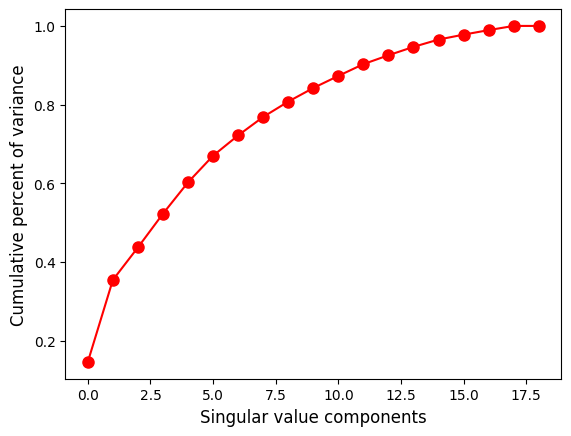

In [72]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()

In [73]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=items.movie_title.tolist())

In [74]:
latent_matrix_1_df.shape

(3706, 19)

## 2. Collaborative Filtering
- Use user_movies_data

In [75]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(user_movies_data)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=items.movie_title.tolist())

In [76]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),132.784373,-14.058038,-17.340275,2.518697,55.508154,7.595662,-0.035543,7.419390,-5.080125,-27.910448,...,-1.495518,-3.481079,1.302856,-2.270964,3.865920,1.255067,8.062450,-0.454503,0.369622,-1.503198
Jumanji (1995),44.573399,-20.000973,5.857215,-16.107409,4.262058,-2.169591,-13.422493,1.170189,4.537862,-8.881403,...,4.470527,0.496409,2.774600,0.033032,-1.231346,-1.288284,1.562663,0.899666,-2.266592,-2.030117
Grumpier Old Men (1995),26.061632,-11.214055,-7.227290,-14.062228,2.594795,2.326936,-2.418638,6.495408,-1.922108,0.955063,...,2.900096,-2.235663,-1.811816,2.562436,3.505528,-1.202054,-2.221712,2.025105,-3.874048,-0.791067
Waiting to Exhale (1995),10.078310,-1.989030,-7.102705,-7.808539,-1.168943,0.549981,-2.255726,-2.012778,1.381022,1.046469,...,-1.639509,-0.412287,-0.004614,-0.525850,1.337861,0.274012,0.143683,-0.740135,-0.647918,0.287243
Father of the Bride Part II (1995),18.395406,-9.055474,-7.171111,-14.964850,1.917957,3.063567,-1.961753,4.847972,-1.605679,-0.106716,...,-1.643023,-1.461494,-0.600523,-0.903203,-2.610108,1.262149,0.730203,-2.285667,-0.686871,2.623361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Meet the Parents (2000),47.975035,-8.135795,-22.778547,8.547096,5.335573,-3.448148,-8.520963,10.735109,-3.917181,7.980559,...,-5.248410,-2.493912,-6.685614,2.016229,-4.318252,0.100829,6.011950,-4.945909,0.349091,10.450655
Requiem for a Dream (2000),24.457903,3.746270,-12.838007,7.045934,-6.276301,-11.966488,-7.286283,-0.539991,2.006429,1.040298,...,0.094937,1.610177,2.626039,0.931863,0.399103,-0.377910,-3.342231,-1.404056,-0.390740,2.231992
Tigerland (2000),4.951244,1.258366,-1.025073,0.189323,-2.343650,-1.504852,-2.011102,0.402278,0.464818,0.813356,...,0.563277,0.525710,0.259584,-0.390124,1.344625,0.366548,-0.590140,1.070954,1.097453,-0.694659
Two Family House (2000),2.208159,1.520669,-2.024009,0.574609,-0.385178,-1.108706,-2.178415,-0.500714,0.047734,1.301536,...,0.445750,-0.519013,-0.328875,0.102841,0.514974,0.663216,0.118388,0.062849,-0.111718,0.407149


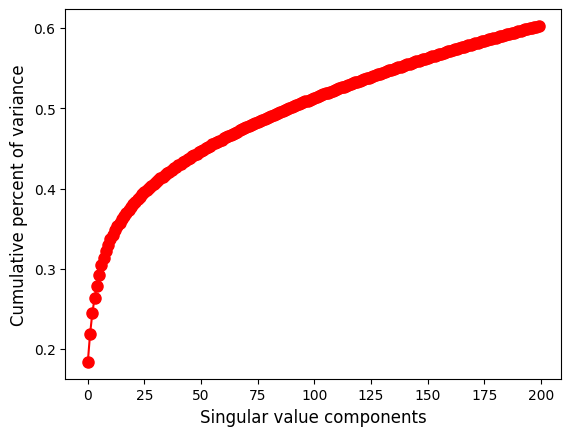

In [77]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)
plt.show()


In [78]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid}
# dictDf = {'collaborative': score_2}
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid,
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),1.000000,0.703450,0.851725
"American Tail, An (1986)",1.000000,0.454854,0.727427
"American Tail: Fievel Goes West, An (1991)",1.000000,0.391368,0.695684
Aladdin and the King of Thieves (1996),1.000000,0.445114,0.722557
"Rugrats Movie, The (1998)",1.000000,0.393999,0.697000
"Bug's Life, A (1998)",1.000000,0.635555,0.817777
Chicken Run (2000),1.000000,0.496088,0.748044
"Adventures of Rocky and Bullwinkle, The (2000)",1.000000,0.361822,0.680911
Saludos Amigos (1943),1.000000,0.180409,0.590205
Thumbelina (1994),0.938437,0.234611,0.586524


In [79]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Aladdin (1992),0.812566,0.711320,0.761943
Toy Story 2 (1999),1.000000,0.703450,0.851725
Groundhog Day (1993),0.197957,0.653165,0.425561
"Lion King, The (1994)",0.745574,0.638041,0.691807
"Bug's Life, A (1998)",1.000000,0.635555,0.817777
Wayne's World (1992),0.345450,0.631041,0.488246
Beauty and the Beast (1991),0.745574,0.628535,0.687054
"Mask, The (1994)",0.111417,0.604944,0.358180
Babe (1995),0.625126,0.604359,0.614743
Men in Black (1997),0.102950,0.602415,0.352682


In [80]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),1.000000,0.703450,0.851725
"Bug's Life, A (1998)",1.000000,0.635555,0.817777
Antz (1998),0.938437,0.589941,0.764189
Aladdin (1992),0.812566,0.711320,0.761943
Chicken Run (2000),1.000000,0.496088,0.748044
Tarzan (1999),0.938437,0.533395,0.735916
Mulan (1998),0.938437,0.530128,0.734283
"American Tail, An (1986)",1.000000,0.454854,0.727427
Pinocchio (1940),0.938437,0.512168,0.725303
"Iron Giant, The (1999)",0.938437,0.507923,0.723180


## 3. Hybrid Recommendation System

In [81]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid}
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [82]:
recommend_similar_movies("Toy Story (1995)")

                                         content  collaborative    hybrid
Toy Story 2 (1999)                      1.000000       0.703450  0.851725
Bug's Life, A (1998)                    1.000000       0.635555  0.817777
Antz (1998)                             0.938437       0.589941  0.764189
Aladdin (1992)                          0.812566       0.711320  0.761943
Chicken Run (2000)                      1.000000       0.496088  0.748044
Tarzan (1999)                           0.938437       0.533395  0.735916
Mulan (1998)                            0.938437       0.530128  0.734283
American Tail, An (1986)                1.000000       0.454854  0.727427
Pinocchio (1940)                        0.938437       0.512168  0.725303
Iron Giant, The (1999)                  0.938437       0.507923  0.723180
Aladdin and the King of Thieves (1996)  1.000000       0.445114  0.722557


In [83]:
recommend_similar_movies("GoldenEye (1995)")

                                    content  collaborative    hybrid
Rock, The (1996)                   1.000000       0.781163  0.890581
Clear and Present Danger (1994)    1.000000       0.770622  0.885311
Con Air (1997)                     1.000000       0.760379  0.880189
Chain Reaction (1996)              1.000000       0.619606  0.809803
World Is Not Enough, The (1999)    0.766889       0.849116  0.808002
Mummy, The (1999)                  0.854382       0.755259  0.804820
Daylight (1996)                    1.000000       0.606413  0.803206
Anaconda (1997)                    1.000000       0.601898  0.800949
Waterworld (1995)                  0.839022       0.745520  0.792271
Twister (1996)                     0.874748       0.695425  0.785086
Die Hard: With a Vengeance (1995)  0.766889       0.802810  0.784850


In [84]:
recommend_similar_movies("Mission: Impossible (1996)")

                                              content  collaborative    hybrid
Young Sherlock Holmes (1985)                 1.000000       0.551635  0.775817
Waterworld (1995)                            0.715559       0.755451  0.735505
Rising Sun (1993)                            0.790151       0.667932  0.729041
Congo (1995)                                 0.788694       0.639317  0.714006
Conspiracy Theory (1997)                     0.656304       0.747068  0.701686
Indiana Jones and the Temple of Doom (1984)  0.715559       0.673487  0.694523
Con Air (1997)                               0.600370       0.779480  0.689925
Rock, The (1996)                             0.600370       0.776865  0.688618
Ghost and the Darkness, The (1996)           0.715559       0.653509  0.684534
GoldenEye (1995)                             0.600370       0.763183  0.681777
True Lies (1994)                             0.557219       0.798035  0.677627


## Turicreate - Python Library for easy recommendation engine building (Depreciated)

### Import the library

In [85]:
# import turicreate

### Create a SFrame for training and testing data

In [86]:
# train_data = turicreate.SFrame(ratings_train)
# test_data = turicreate.SFrame(ratings_test)

### Popularity Recommender - Cold Start problem

In [87]:
# popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating')

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

In [88]:
# popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
# popularity_recomm.print_rows(num_rows=25)

### Insights ??

-
-

### Item Similarity Recommender
#### Training the model

In [89]:
# item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

#### Making recommendations for users 1, 2, 3, 4, 5

In [90]:
# item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
# item_sim_recomm.print_rows(num_rows=25)

### Insights ?
-
-

# 4. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [91]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [92]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [93]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 901.1835
Iteration: 40 ; error = 887.2193
Iteration: 60 ; error = 848.8304
Iteration: 80 ; error = 811.1004
Iteration: 100 ; error = 782.6870

P x Q:
[[4.35224552 3.46025852 3.55760157 ... 3.93041037 4.25617953 4.06570183]
 [4.01465133 3.24537705 3.25503223 ... 3.57170975 3.84282323 3.78908156]
 [4.07618341 3.43846274 3.62783239 ... 3.82697106 4.23295847 4.02876818]
 ...
 [4.07405083 3.30449338 2.96941668 ... 3.46574979 3.93919255 3.85226994]
 [4.18536987 3.27637021 3.0735475  ... 3.60549552 3.94259069 3.81677549]
 [3.37103326 2.40573757 2.15460276 ... 3.22416565 3.6921677  3.63378698]]



## Surprise

In [94]:
!pip install surprise

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-macosx_14_0_arm64.whl size=1116281 sha256=bbc5c2e39c0806d3378d9e1022788576b8a43a77077ec5290931d49a8a83f24c
  Stored in directory: /Users/bng-anuphap_c/Library/Caches/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/hom

In [95]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [96]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [97]:
items

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,,,,,,,,,,Animation Children's Comedy ...
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,,,,,,,,,,Adventure Children's Fantasy ...
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,,,,,Romance,,,,,Comedy Romance ...
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,,,,,,,,,,Comedy Drama
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,,,,,,,,,,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),0,0,0,0,1,0,0,0,...,,,,,,,,,,Comedy
3879,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,Drama
3880,3950,Tigerland (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,Drama
3881,3951,Two Family House (2000),0,0,0,0,0,0,0,1,...,,,,,,,,,,Drama


In [98]:
Mapping_file = dict(zip(items.movie_title.tolist(), items.movie_id.tolist()))

In [99]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.8792


0.8792124236292139

In [100]:
def pred_user_rating(ui):
    if ui in ratings.user_id.unique():
        ui_list = ratings[ratings.user_id == ui].movie_id.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}
        predictedL = []
        for i, j in d.items():
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3]))
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)
        pdf.set_index('movies', inplace=True)
        return pdf.head(10)
    else:
        print("User Id does not exist in the list!")
        return None

In [101]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
"Godfather: Part II, The (1974)",4.816509
Singin' in the Rain (1952),4.753707
Pather Panchali (1955),4.716310
Inherit the Wind (1960),4.694141
To Live (Huozhe) (1994),4.688055
Paths of Glory (1957),4.663032
Central Station (Central do Brasil) (1998),4.646031
Gandhi (1982),4.644605
Sanjuro (1962),4.640600


In [102]:
pred_user_rating(50)

,ratings
movies,
Sanjuro (1962),4.459381
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.426716
Yojimbo (1961),4.361030
It's a Wonderful Life (1946),4.350714
M (1931),4.338832
Pather Panchali (1955),4.338443
Paths of Glory (1957),4.310921
To Live (Huozhe) (1994),4.293237
On the Waterfront (1954),4.270831


In [103]:
pred_user_rating(49)

,ratings
movies,
"Silence of the Lambs, The (1991)",4.826735
Wallace & Gromit: The Best of Aardman Animation (1996),4.646040
Inherit the Wind (1960),4.644148
Double Indemnity (1944),4.641595
"Shawshank Redemption, The (1994)",4.638921
Sanjuro (1962),4.620776
Creature Comforts (1990),4.601989
Rear Window (1954),4.589959
"Christmas Story, A (1983)",4.582573


In [104]:
pred_user_rating(1)

,ratings
movies,
"Godfather: Part II, The (1974)",4.816509
Singin' in the Rain (1952),4.753707
Pather Panchali (1955),4.716310
Inherit the Wind (1960),4.694141
To Live (Huozhe) (1994),4.688055
Paths of Glory (1957),4.663032
Central Station (Central do Brasil) (1998),4.646031
Gandhi (1982),4.644605
Sanjuro (1962),4.640600


In [105]:
pred_user_rating(2000)

,ratings
movies,
My Life as a Dog (Mitt liv som hund) (1985),4.858626
"Grand Day Out, A (1992)",4.804731
"Graduate, The (1967)",4.787495
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.780452
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.772414
"Wrong Trousers, The (1993)",4.772250
"Close Shave, A (1995)",4.766992
Lawrence of Arabia (1962),4.729392
"Godfather, The (1972)",4.705063
